In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# %matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (12,8)

# Movie Industry Portfolio Project Follow-Along

### Data

The data used in this analysis is from Kaggle, uploaded by user Daniel Grijalva. The dataset contains 6820 movies scraped from IMDb with attributes such as budget, country, director, genre, etc. 

- Downloaded - 11/27/2022 (repository includes .csv of data used)
- License - CC0: Public Domain
- Expected update frequency - Annually

https://www.kaggle.com/datasets/danielgrijalvas/movies


### Alex The Analyst

The analysis follows along with a video uploaded by Alex The Analyst where he guides the viewer through correlation in Python.

https://www.youtube.com/watch?v=iPYVYBtUTyE

#### Data Loading

In [2]:
df = pd.read_csv('movies.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### Data Cleaning & Transforming

In [3]:
# finding percentage of null values by column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# dropping rows with null values

df = df.dropna()

In [5]:
# data type of each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# converting budget and gross from float64 to int64

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
# there is a column for the year the film was released, but this does not always correct
# creating new column called yearcorrect that temp looks at released as a string and pulls out the year

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [8]:
# sorting df by gross and reassigning

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [9]:
# confirming there are no duplicate rows

df.duplicated().sum()

0

<AxesSubplot:>

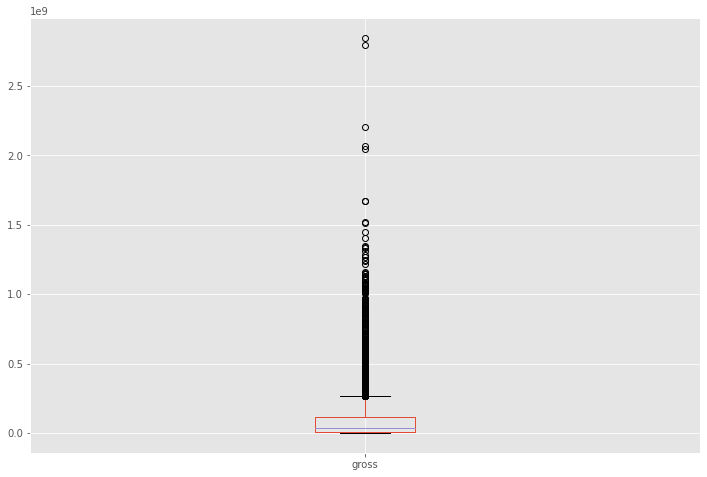

In [10]:
# are there any outliers?

df.boxplot(column=['gross'])

In [11]:
# top 15 companies by gross revenue

comp_gross = df.groupby('company')[['gross']].sum()

comp_gross_sorted = comp_gross.sort_values('gross', ascending = False)[:15]

comp_gross_sorted = comp_gross_sorted['gross'].astype('int64') 

comp_gross_sorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [12]:
# top 15 companies by year and gross revenue

comp_year_gross = df.groupby(['company', 'year'])[['gross']].sum()

comp_year_gross_sorted = comp_year_gross.sort_values(['gross','company','year'], ascending = False)[:15]

comp_year_gross_sorted = comp_year_gross_sorted['gross'].astype('int64') 

comp_year_gross_sorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

#### Correlation Analysis

Text(0, 0.5, 'Gross Earnings')

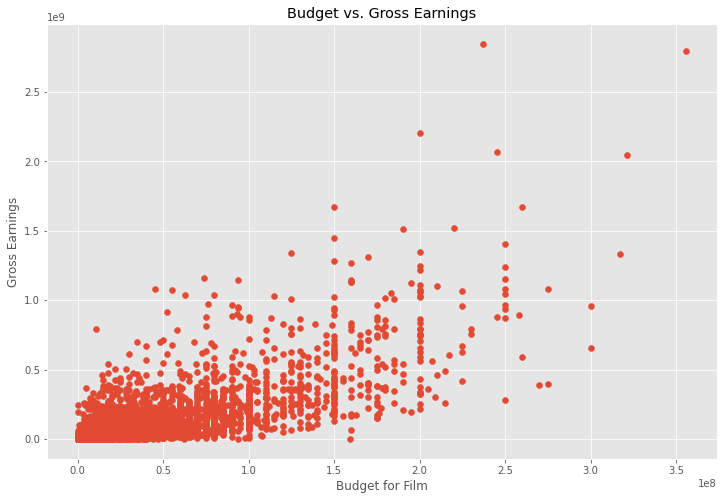

In [22]:
# curious about the correlation between budget and gross earnings so looking at the two attributes in a scatter plot

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

# plt.show()

# looks like there may be a correlation but not totally sure

<AxesSubplot:xlabel='budget', ylabel='gross'>

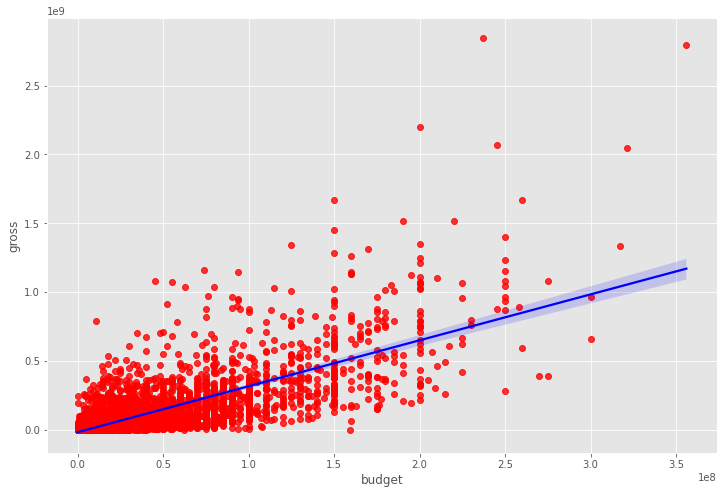

In [14]:
# also plot using seaborn

sns.regplot(x = "budget", y = "gross", data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

# can confirm there is a positive correlation, but do not currently have value

In [15]:
# start looking at correlation

df.corr()

# .corr() only works with numeric values (default method is pearson)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(87.0, 0.5, 'Movie Features')

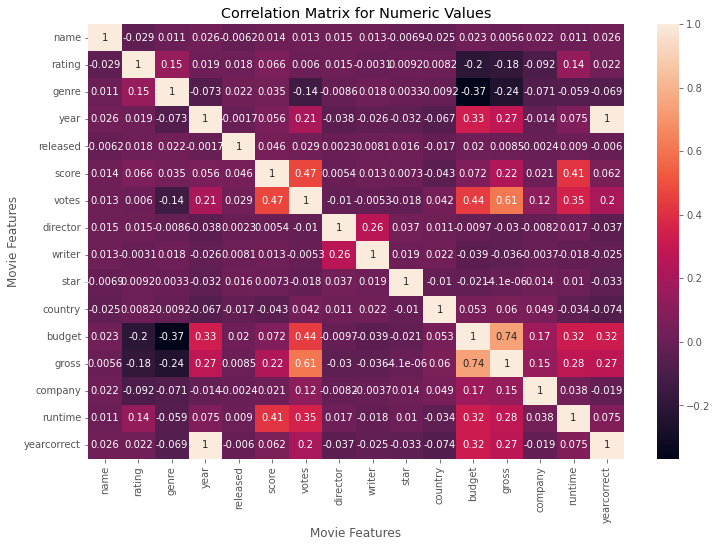

In [23]:
# looking at .corr() values in a heatmap

corr_mat = df.corr()

sns.heatmap(corr_mat, annot = True)

plt.title('Correlation Matrix for Numeric Values')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# plt.show()

# there is 0.74 positive correlation between budget and gross

In [17]:
# now looking at company (which is not numeric)

# use for loop to convert non-numeric values to numeric using .cat.codes

df_num = df

for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num

# existing numeric values were untouched

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,2015
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,1994
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,2001
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,1982


In [18]:
df_num.corr()

# a lot to look at so will visualize

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


Text(87.0, 0.5, 'Movie Features')

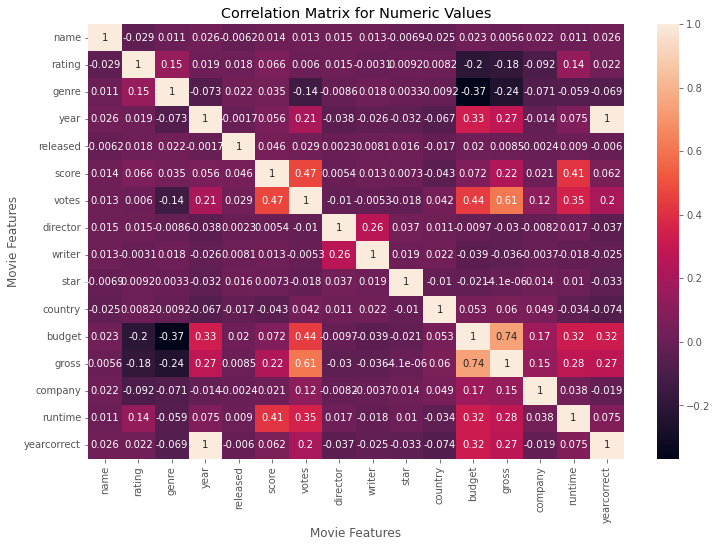

In [25]:
# all-attribute heatmap using seaborn 

correlation_matrix = df_num.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Values')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# plt.show()

In [20]:
# the above heatmap is still a lot of information to take in so will unstack to better drill down and sort by value

# pd.set_option('display.max_rows', None)

correlation_matrix = df_num.corr()

corr_pairs = correlation_matrix.unstack().sort_values()

corr_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [21]:
# only looking at pairs where the correlation is greater than 0.5

pd.set_option('display.max_rows', None)

high_corr = corr_pairs[(corr_pairs) > 0.5]

high_corr

# votes and budget have the highest correlation to gross earnings
# correaltion with company is < 0.5

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64